## IMPORTING PYTHON LIBRARIES

In [2]:
import pandas as pd
import json 
import os 

## DATA FOR IPL MATCH

In [2]:
# Folder path OF the Indian Premier League match folder
folder_path = 'ipl_json' 

# THIS WILL READ & OPEN ALL JSON FILES STORE IN IPL MATCH FOLDER
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

# IT Store All Data from json files
data_ipl = []

#Loops for open multiple json files in the folder
for filename in json_files:
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as f:
        match = json.load(f)

    info = match.get("info", {})  # THIS GET INFO DATA FROM MATCH AND THEN GET ALL COLUMNS FROM INFO 
    match_date = info.get("dates", [None])[0]
    venue = info.get("venue")
    match_type = info.get("match_type")
    season = info.get("season")
    teams = info.get("teams", [None, None])
    team_1, team_2 = teams if len(teams) == 2 else (None, None) #THIS IS FOR BOTH TEAMS INFORMATION 
    player_of_match = info.get("player_of_match", [None])[0]
    outcome = info.get("outcome", {})
    winner = outcome.get("winner")
    win_by_run = outcome.get("by", {}).get("runs")
    win_by_wickets = outcome.get("by", {}).get("wickets")
    
    for inning in match.get("innings", []): #THIS LOOP IS USED TO GET DATA ABOUT EVERY OVERS AND PLAYERS FRON INNINGS
        batting_team = inning.get("team")
        bowling_team = team_2 if batting_team == team_1 else team_1
        for over in inning.get("overs", []): # OVER HAS 6 DIFF DATA SO THIS LOOP IS TO GET ALL 6 TYPE OF DATA
            over_num = over.get("over")
            for delivery in over.get("deliveries", []):
                data = {
                    "match_date": match_date,
                    "venue": venue,
                    "match_type": match_type,
                    "season": season,
                    "team_1": team_1,
                    "team_2": team_2,
                    "batting_team": batting_team,
                    "bowling_team": bowling_team,
                    "over": over_num,
                    "batter": delivery.get("batter"),
                    "bowler": delivery.get("bowler"),
                    "non_striker": delivery.get("non_striker"),
                    "runs_batter": delivery.get("runs", {}).get("batter", 0),
                    "runs_extras": delivery.get("runs", {}).get("extras", 0),
                    "runs_total": delivery.get("runs", {}).get("total", 0),
                    "player_of_match": player_of_match,
                    "winner": winner,
                    "win_by_runs": win_by_run,
                    "win_by_wickets": win_by_wickets
                
                }

                data_ipl.append(data)

# Convert to DataFrame
df_ipl = pd.DataFrame(data_ipl)

In [3]:
df_ipl.head()

,match_date,venue,match_type,season,team_1,team_2,batting_team,bowling_team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_of_match,winner,win_by_runs,win_by_wickets
0,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",T20,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,0,DA Warner,TS Mills,S Dhawan,0,0,0,Yuvraj Singh,Sunrisers Hyderabad,35.0,NaN
1,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",T20,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,0,DA Warner,TS Mills,S Dhawan,0,0,0,Yuvraj Singh,Sunrisers Hyderabad,35.0,NaN
2,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",T20,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,0,DA Warner,TS Mills,S Dhawan,4,0,4,Yuvraj Singh,Sunrisers Hyderabad,35.0,NaN
3,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",T20,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,0,DA Warner,TS Mills,S Dhawan,0,0,0,Yuvraj Singh,Sunrisers Hyderabad,35.0,NaN
4,2017-04-05,"Rajiv Gandhi International Stadium, Uppal",T20,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,0,DA Warner,TS Mills,S Dhawan,0,2,2,Yuvraj Singh,Sunrisers Hyderabad,35.0,NaN


## DATA OF T20 MATCH

In [4]:
# Folder path OF the T20  match folder
folder_path = 't20s_json' 

# THIS WILL READ & OPEN ALL JSON FILES STORE IN IPL MATCH FOLDER
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

# IT Store All Data from json files
data_t20 = []

#Loops for open multiple json files in the folder
for filename in json_files:
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as f:
        match = json.load(f)

    info = match.get("info", {})  # THIS GET INFO DATA FROM MATCH AND THEN GET ALL COLUMNS FROM INFO 
    match_date = info.get("dates", [None])[0]
    venue = info.get("venue")
    match_type = info.get("match_type")
    season = info.get("season")
    teams = info.get("teams", [None, None])
    team_1, team_2 = teams if len(teams) == 2 else (None, None) #THIS IS FOR BOTH TEAMS INFORMATION 
    player_of_match = info.get("player_of_match", [None])[0]
    outcome = info.get("outcome", {})
    winner = outcome.get("winner")
    win_by_run = outcome.get("by", {}).get("runs")
    win_by_wickets = outcome.get("by", {}).get("wickets")
    
    for inning in match.get("innings", []): #THIS LOOP IS USED TO GET DATA ABOUT EVERY OVERS AND PLAYERS FRON INNINGS
        batting_team = inning.get("team")
        bowling_team = team_2 if batting_team == team_1 else team_1
        for over in inning.get("overs", []): # OVER HAS 6 DIFF DATA SO THIS LOOP IS TO GET ALL 6 TYPE OF DATA
            over_num = over.get("over")
            for delivery in over.get("deliveries", []):
                data = {
                    "match_date": match_date,
                    "venue": venue,
                    "match_type": match_type,
                    "season": season,
                    "team_1": team_1,
                    "team_2": team_2,
                    "batting_team": batting_team,
                    "bowling_team": bowling_team,
                    "over": over_num,
                    "batter": delivery.get("batter"),
                    "bowler": delivery.get("bowler"),
                    "non_striker": delivery.get("non_striker"),
                    "runs_batter": delivery.get("runs", {}).get("batter", 0),
                    "runs_extras": delivery.get("runs", {}).get("extras", 0),
                    "runs_total": delivery.get("runs", {}).get("total", 0),
                    "player_of_match": player_of_match,
                    "winner": winner,
                    "win_by_runs": win_by_run,
                    "win_by_wickets": win_by_wickets
                
                }

                data_t20.append(data)

# Convert to DataFrame
df_t20 = pd.DataFrame(data_t20)

In [5]:
df_t20.head()

,match_date,venue,match_type,season,team_1,team_2,batting_team,bowling_team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_of_match,winner,win_by_runs,win_by_wickets
0,2017-02-17,Melbourne Cricket Ground,T20,2016/17,Australia,Sri Lanka,Australia,Sri Lanka,0,AJ Finch,SL Malinga,M Klinger,0,0,0,DAS Gunaratne,Sri Lanka,NaN,5.0
1,2017-02-17,Melbourne Cricket Ground,T20,2016/17,Australia,Sri Lanka,Australia,Sri Lanka,0,AJ Finch,SL Malinga,M Klinger,0,0,0,DAS Gunaratne,Sri Lanka,NaN,5.0
2,2017-02-17,Melbourne Cricket Ground,T20,2016/17,Australia,Sri Lanka,Australia,Sri Lanka,0,AJ Finch,SL Malinga,M Klinger,1,0,1,DAS Gunaratne,Sri Lanka,NaN,5.0
3,2017-02-17,Melbourne Cricket Ground,T20,2016/17,Australia,Sri Lanka,Australia,Sri Lanka,0,M Klinger,SL Malinga,AJ Finch,2,0,2,DAS Gunaratne,Sri Lanka,NaN,5.0
4,2017-02-17,Melbourne Cricket Ground,T20,2016/17,Australia,Sri Lanka,Australia,Sri Lanka,0,M Klinger,SL Malinga,AJ Finch,0,0,0,DAS Gunaratne,Sri Lanka,NaN,5.0


## DATA OF TEST MATCH

In [6]:
# Folder path OF the TEST match folder
folder_path = 'tests_json' 

# THIS WILL READ & OPEN ALL JSON FILES STORE IN ODI MATCH FOLDER
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

# IT Store All Data from json files
data_test = []

#Loops for open multiple json files in the folder
for filename in json_files:
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as f:
        match = json.load(f)

    info = match.get("info", {})  # THIS GET INFO DATA FROM MATCH AND THEN GET ALL COLUMNS FROM INFO 
    match_date = info.get("dates", [None])[0]
    venue = info.get("venue")
    match_type = info.get("match_type")
    season = info.get("season")
    teams = info.get("teams", [None, None])
    team_1, team_2 = teams if len(teams) == 2 else (None, None) #THIS IS FOR BOTH TEAMS INFORMATION 
    player_of_match = info.get("player_of_match", [None])[0]
    outcome = info.get("outcome", {})
    winner = outcome.get("winner")
    win_by_run = outcome.get("by", {}).get("runs")
    win_by_wickets = outcome.get("by", {}).get("wickets")
    
    for inning in match.get("innings", []): #THIS LOOP IS USED TO GET DATA ABOUT EVERY OVERS AND PLAYERS FRON INNINGS
        batting_team = inning.get("team")
        bowling_team = team_2 if batting_team == team_1 else team_1
        for over in inning.get("overs", []): # OVER HAS 6 DIFF DATA SO THIS LOOP IS TO GET ALL 6 TYPE OF DATA
            over_num = over.get("over")
            for delivery in over.get("deliveries", []):
                data = {
                    "match_date": match_date,
                    "venue": venue,
                    "match_type": match_type,
                    "season": season,
                    "team_1": team_1,
                    "team_2": team_2,
                    "batting_team": batting_team,
                    "bowling_team": bowling_team,
                    "over": over_num,
                    "batter": delivery.get("batter"),
                    "bowler": delivery.get("bowler"),
                    "non_striker": delivery.get("non_striker"),
                    "runs_batter": delivery.get("runs", {}).get("batter", 0),
                    "runs_extras": delivery.get("runs", {}).get("extras", 0),
                    "runs_total": delivery.get("runs", {}).get("total", 0),
                    "player_of_match": player_of_match,
                    "winner": winner,
                    "win_by_runs": win_by_run,
                    "win_by_wickets": win_by_wickets
                
                }

                data_test.append(data)

# Convert to DataFrame
df_test = pd.DataFrame(data_test)

In [7]:
df_test.head()

,match_date,venue,match_type,season,team_1,team_2,batting_team,bowling_team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_of_match,winner,win_by_runs,win_by_wickets
0,2016-11-03,Western Australia Cricket Association Ground,Test,2016/17,Australia,South Africa,South Africa,Australia,0,SC Cook,MA Starc,D Elgar,0,0,0,K Rabada,South Africa,177.0,NaN
1,2016-11-03,Western Australia Cricket Association Ground,Test,2016/17,Australia,South Africa,South Africa,Australia,0,SC Cook,MA Starc,D Elgar,0,0,0,K Rabada,South Africa,177.0,NaN
2,2016-11-03,Western Australia Cricket Association Ground,Test,2016/17,Australia,South Africa,South Africa,Australia,0,SC Cook,MA Starc,D Elgar,0,0,0,K Rabada,South Africa,177.0,NaN
3,2016-11-03,Western Australia Cricket Association Ground,Test,2016/17,Australia,South Africa,South Africa,Australia,0,SC Cook,MA Starc,D Elgar,0,0,0,K Rabada,South Africa,177.0,NaN
4,2016-11-03,Western Australia Cricket Association Ground,Test,2016/17,Australia,South Africa,South Africa,Australia,0,HM Amla,MA Starc,D Elgar,0,0,0,K Rabada,South Africa,177.0,NaN


## DATA FOR ODI MATCH

In [8]:
# Folder path OF the One Day International match folder
folder_path = 'odis_json' 

# THIS WILL READ & OPEN ALL JSON FILES STORE IN ODI MATCH FOLDER
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

# IT Store All Data from json files
data_odi = []

#Loops for open multiple json files in the folder
for filename in json_files:
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as f:
        match = json.load(f)

    info = match.get("info", {})  # THIS GET INFO DATA FROM MATCH AND THEN GET ALL COLUMNS FROM INFO 
    match_date = info.get("dates", [None])[0]
    venue = info.get("venue")
    match_type = info.get("match_type")
    season = info.get("season")
    teams = info.get("teams", [None, None])
    team_1, team_2 = teams if len(teams) == 2 else (None, None) #THIS IS FOR BOTH TEAMS INFORMATION 
    player_of_match = info.get("player_of_match", [None])[0]
    outcome = info.get("outcome", {})
    winner = outcome.get("winner")
    win_by_run = outcome.get("by", {}).get("runs")
    win_by_wickets = outcome.get("by", {}).get("wickets")
    
    for inning in match.get("innings", []): #THIS LOOP IS USED TO GET DATA ABOUT EVERY OVERS AND PLAYERS FRON INNINGS
        batting_team = inning.get("team")
        bowling_team = team_2 if batting_team == team_1 else team_1
        for over in inning.get("overs", []): # OVER HAS 6 DIFF DATA SO THIS LOOP IS TO GET ALL 6 TYPE OF DATA
            over_num = over.get("over")
            for delivery in over.get("deliveries", []):
                data = {
                    "match_date": match_date,
                    "venue": venue,
                    "match_type": match_type,
                    "season": season,
                    "team_1": team_1,
                    "team_2": team_2,
                    "batting_team": batting_team,
                    "bowling_team": bowling_team,
                    "over": over_num,
                    "batter": delivery.get("batter"),
                    "bowler": delivery.get("bowler"),
                    "non_striker": delivery.get("non_striker"),
                    "runs_batter": delivery.get("runs", {}).get("batter", 0),
                    "runs_extras": delivery.get("runs", {}).get("extras", 0),
                    "runs_total": delivery.get("runs", {}).get("total", 0),
                    "player_of_match": player_of_match,
                    "winner": winner,
                    "win_by_runs": win_by_run,
                    "win_by_wickets": win_by_wickets
                
                }

                data_odi.append(data)

# Convert to DataFrame
df_odi = pd.DataFrame(data_odi)

In [9]:
df_odi.head()

,match_date,venue,match_type,season,team_1,team_2,batting_team,bowling_team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_of_match,winner,win_by_runs,win_by_wickets
0,2017-01-13,"Brisbane Cricket Ground, Woolloongabba",ODI,2016/17,Australia,Pakistan,Australia,Pakistan,0,DA Warner,Mohammad Amir,TM Head,0,0,0,MS Wade,Australia,92.0,NaN
1,2017-01-13,"Brisbane Cricket Ground, Woolloongabba",ODI,2016/17,Australia,Pakistan,Australia,Pakistan,0,DA Warner,Mohammad Amir,TM Head,0,0,0,MS Wade,Australia,92.0,NaN
2,2017-01-13,"Brisbane Cricket Ground, Woolloongabba",ODI,2016/17,Australia,Pakistan,Australia,Pakistan,0,DA Warner,Mohammad Amir,TM Head,0,0,0,MS Wade,Australia,92.0,NaN
3,2017-01-13,"Brisbane Cricket Ground, Woolloongabba",ODI,2016/17,Australia,Pakistan,Australia,Pakistan,0,DA Warner,Mohammad Amir,TM Head,0,0,0,MS Wade,Australia,92.0,NaN
4,2017-01-13,"Brisbane Cricket Ground, Woolloongabba",ODI,2016/17,Australia,Pakistan,Australia,Pakistan,0,DA Warner,Mohammad Amir,TM Head,0,1,1,MS Wade,Australia,92.0,NaN


## SQL DATABASE

In [3]:
import sqlite3

In [4]:
conn_base = sqlite3.connect("cricket.db")
cursor = conn_base.cursor()
# This create Database if not exist 

### STORING DATA FRAMES INTO CRICKET DATABSE

In [12]:
# Store your DataFrame in a new table (auto creates table + inserts data)
df_ipl.to_sql("ipl_matches", conn_base, if_exists = "replace", index = False)
df_t20.to_sql("t20_matches", conn_base, if_exists = "replace", index = False)
df_odi.to_sql("odi_matches", conn_base, if_exists = "replace", index = False)
df_test.to_sql("test_matches", conn_base, if_exists = "replace", index = False)

1683114

# SQL Queries with Visualised Graphs

In [8]:
import matplotlib.pyplot as plt

### Top 5 Batsmen by Total Runs in ODI

In [9]:
g_1 = pd.read_sql_query("""
SELECT batter, SUM(runs_batter) AS total_runs
FROM odi_matches
GROUP BY batter
ORDER BY total_runs DESC
LIMIT 5;
""", conn_base)
g_1

,batter,total_runs
0,V Kohli,14059
1,KC Sangakkara,11618
2,RG Sharma,10948
3,MS Dhoni,10274
4,AB de Villiers,9435


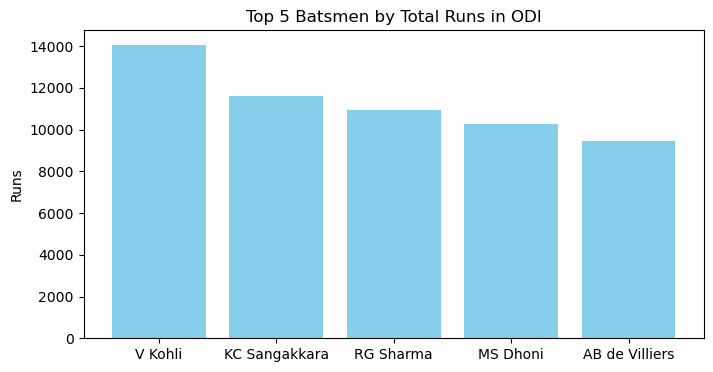

In [27]:
plt.figure(figsize=(8,4))
plt.bar(g_1['batter'], g_1['total_runs'], color='skyblue')
plt.title("Top 5 Batsmen by Total Runs in ODI")
plt.ylabel('Runs')
plt.show()

### Most Wickets in IPL

In [28]:
g_2 = pd.read_sql_query("""
SELECT bowler, COUNT(*) AS wickets
FROM ipl_matches
WHERE runs_batter = 0 AND win_by_wickets IS NULL AND win_by_runs IS NULL
      AND batter = player_of_match  IS NOT NULL
GROUP BY bowler
ORDER BY wickets DESC
LIMIT 10;
""", conn_base)
g_2

,bowler,wickets
0,JJ Bumrah,54
1,AR Patel,42
2,KH Pandya,36
3,Rashid Khan,34
4,Sandeep Sharma,33
5,Mohammed Shami,32
6,A Mishra,32
7,K Rabada,30
8,R Vinay Kumar,29
9,M Muralitharan,28


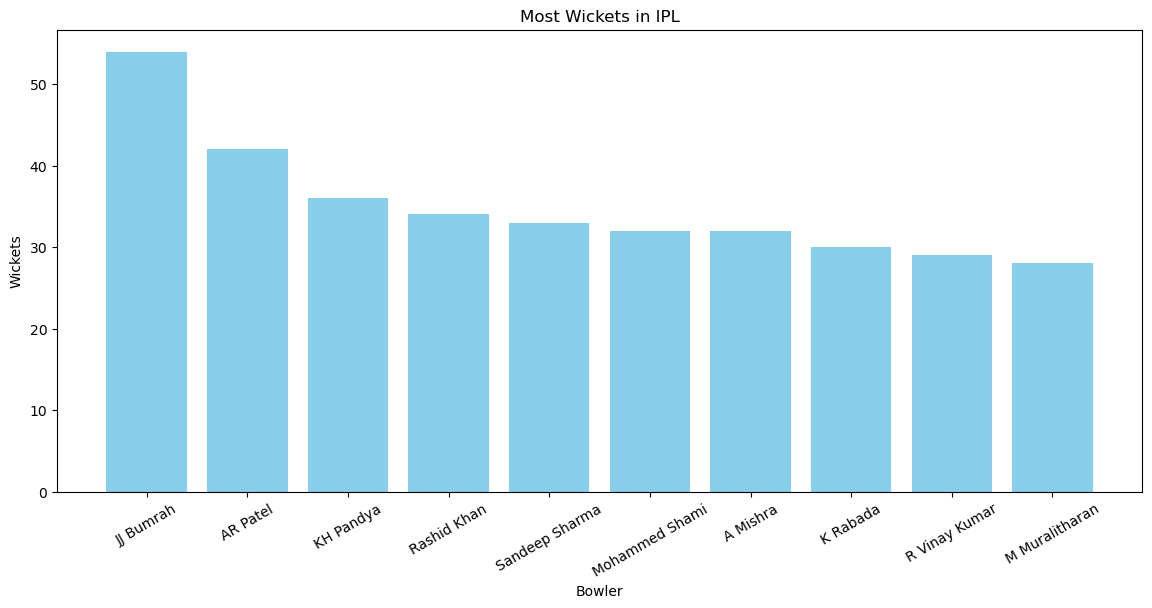

In [65]:
plt.figure(figsize=(14,6))
plt.bar(g_2["bowler"], g_2["wickets"], color = 'skyblue')
plt.title("Most Wickets in IPL")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.xticks(rotation=30)
plt.show()

### Top 10 Batters Century Scorers

In [54]:
g_3 = pd.read_sql_query("""
SELECT batter, COUNT(*) AS centuries
FROM (
    SELECT match_date, batter, SUM(runs_batter) AS total_runs
    FROM test_matches
    GROUP BY match_date, batter
    HAVING total_runs >= 100
)
GROUP BY batter
ORDER BY centuries DESC
LIMIT 10;
""", conn_base)
g_3

,batter,centuries
0,AN Cook,52
1,JE Root,48
2,KS Williamson,40
3,SPD Smith,39
4,HM Amla,38
5,V Kohli,36
6,KC Sangakkara,36
7,MJ Clarke,33
8,JH Kallis,33
9,GC Smith,33


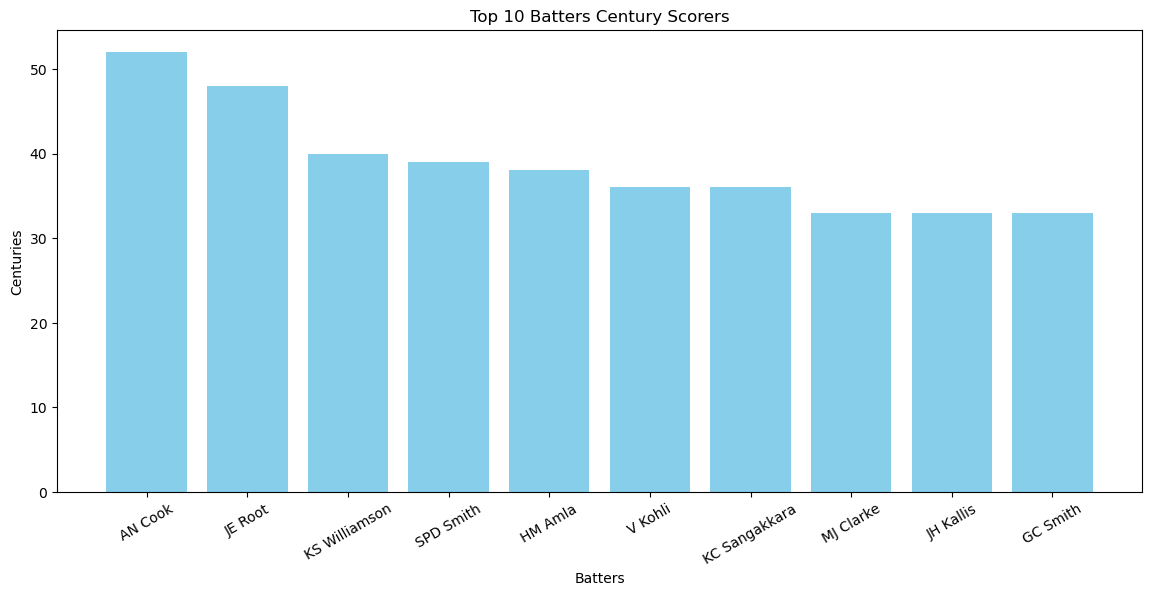

In [64]:
plt.figure(figsize=(14,6))
plt.bar(g_3["batter"], g_3["centuries"], color = 'skyblue')
plt.title("Top 10 Batters Century Scorers")
plt.xlabel("Batters")
plt.ylabel("Centuries")
plt.xticks(rotation=30)
plt.show()

### Most Sixes in IPL

In [58]:
g_4 = pd.read_sql_query("""
SELECT batter, COUNT(*) AS sixes
FROM ipl_matches
WHERE runs_batter = 6
GROUP BY batter
ORDER BY sixes DESC
LIMIT 5;
""", conn_base)
g_4

,batter,sixes
0,CH Gayle,359
1,RG Sharma,303
2,V Kohli,292
3,MS Dhoni,264
4,AB de Villiers,253


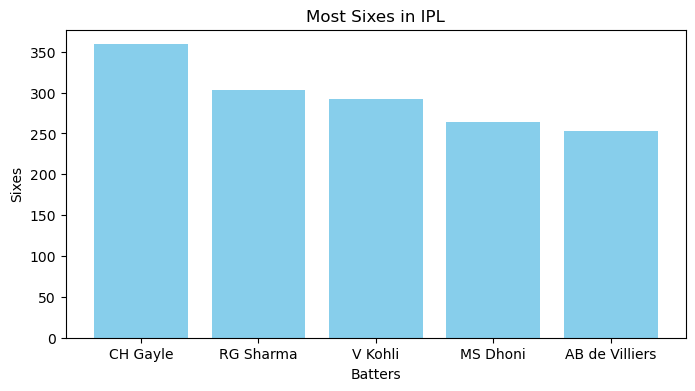

In [59]:
plt.figure(figsize=(8,4))
plt.bar(g_4["batter"], g_4["sixes"], color="skyblue")
plt.title("Most Sixes in IPL")
plt.xlabel("Batters")
plt.ylabel("Sixes")
plt.show()

### TOP 10 ODI Team with Best Win %

In [63]:
g_5 = pd.read_sql_query("""
WITH matches AS (
    SELECT DISTINCT match_date, team_1 AS team FROM odi_matches
    UNION ALL
    SELECT DISTINCT match_date, team_2 AS team FROM odi_matches
),
wins AS (
    SELECT DISTINCT match_date, winner AS team FROM odi_matches WHERE winner IS NOT NULL
)
SELECT m.team,
       COUNT(w.team) * 100.0 / COUNT(m.team) AS win_percentage
FROM matches m
LEFT JOIN wins w ON m.match_date = w.match_date AND m.team = w.team
GROUP BY m.team
ORDER BY win_percentage DESC
LIMIT 10;
""", conn_base)
g_5

,team,win_percentage
0,Australia,67.019400
1,Asia XI,60.000000
2,India,59.903382
3,South Africa,58.051690
4,Thailand,57.142857
5,England,54.430380
6,Scotland,50.000000
7,New Zealand,50.000000
8,Nepal,50.000000
9,Oman,49.206349


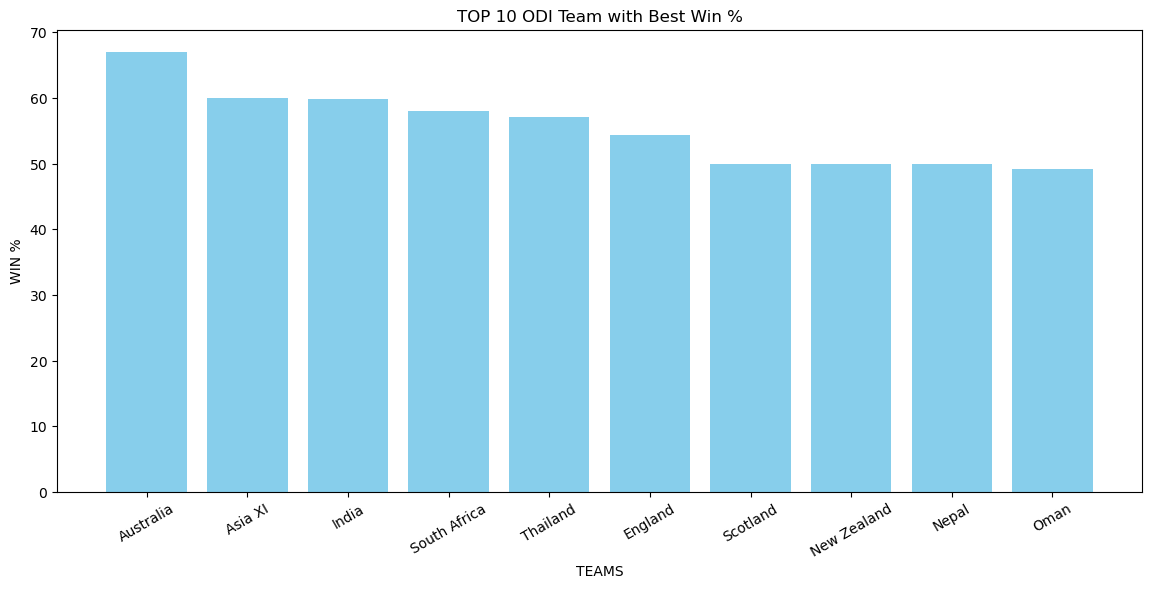

In [67]:
plt.figure(figsize=(14,6))
plt.bar(g_5["team"], g_5["win_percentage"], color = "skyblue")
plt.title("TOP 10 ODI Team with Best Win %")
plt.xlabel("TEAMS")
plt.xticks(rotation=30)
plt.ylabel("WIN %")
plt.show()

###  Run Rate Per Over in T20

In [68]:
g_6 = pd.read_sql_query("""
SELECT over, ROUND(SUM(runs_total)*1.0/COUNT(*), 2) AS run_rate
FROM t20_matches
GROUP BY over
ORDER BY over;
""", conn_base)
g_6

,over,run_rate
0,0,0.88
1,1,1.01
2,2,1.07
3,3,1.09
4,4,1.10
5,5,1.09
6,6,0.96
7,7,1.00
8,8,1.01
9,9,1.03


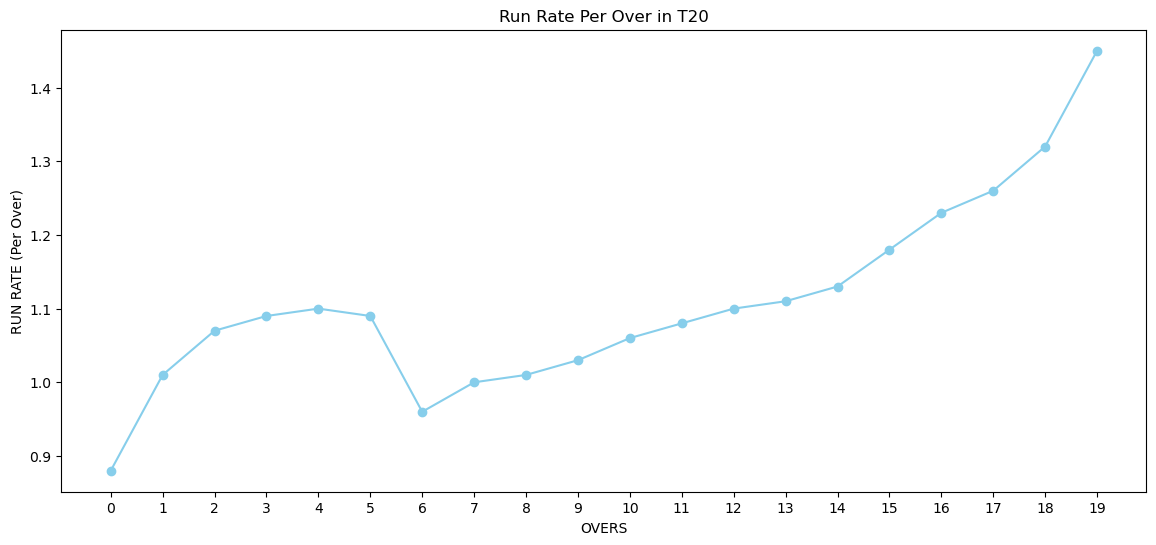

In [85]:
over = list(range(20))
plt.figure(figsize=(14,6))
plt.plot(g_6["over"], g_6["run_rate"], marker = "o", color = "skyblue")
plt.title("Run Rate Per Over in T20")
plt.xlabel("OVERS")
plt.ylabel("RUN RATE (Per Over)")
plt.xticks(ticks=range(min(over), max(over)+1)) 
plt.show()

### Top IPL Venues

In [6]:
g_7 = pd.read_sql_query("""
SELECT venue, COUNT(DISTINCT match_date) AS match_count
FROM ipl_matches
GROUP BY venue
ORDER BY match_count DESC
LIMIT 5;
""", conn_base)
g_7

,venue,match_count
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Wankhede Stadium, Mumbai",52


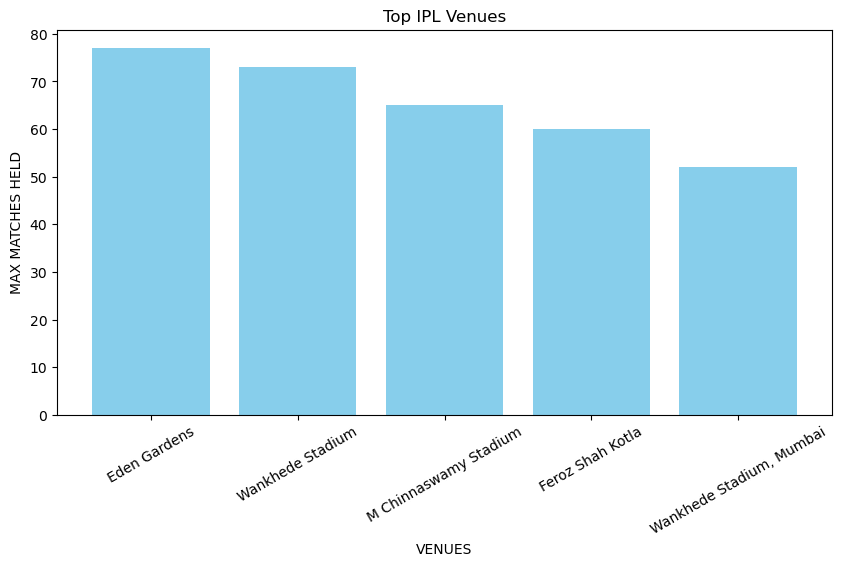

In [9]:
plt.figure(figsize=(10,5))
plt.bar(g_7["venue"], g_7["match_count"], color = "skyblue")
plt.title("Top IPL Venues")
plt.xlabel("VENUES")
plt.xticks(rotation=30)
plt.ylabel("MAX MATCHES HELD")
plt.show()

### Best Economy Bowlers in T20 (min 12 balls)

In [10]:
g_8 = pd.read_sql_query("""
SELECT bowler, COUNT(*) AS balls_bowled, 
       SUM(runs_total) AS runs_given,
       ROUND(SUM(runs_total) * 6.0 / COUNT(*), 2) AS economy
FROM t20_matches
GROUP BY bowler
HAVING balls_bowled >= 12
ORDER BY economy ASC
LIMIT 5;
""", conn_base)
g_8

,bowler,balls_bowled,runs_given,economy
0,C Kauripeke,18,0,0.00
1,P Chakraborty,12,1,0.50
2,S Khatiwada,12,1,0.50
3,Anjali Chand,44,4,0.55
4,TW Dlamini,12,2,1.00


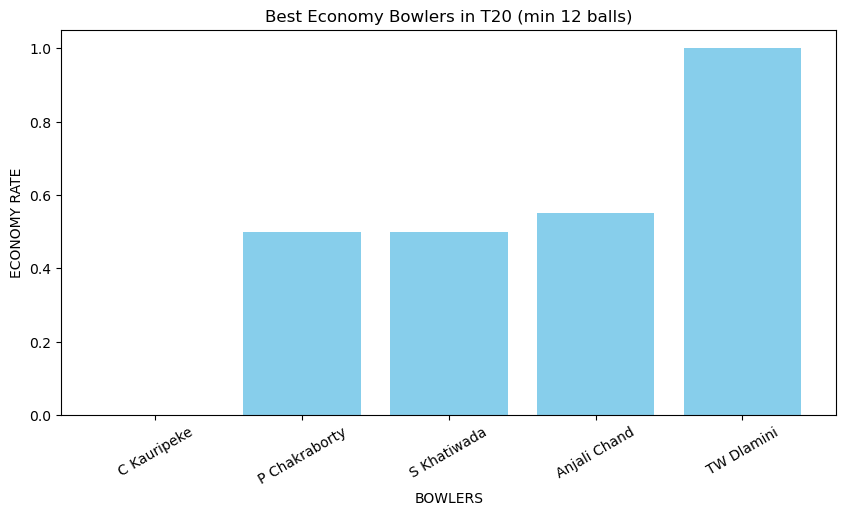

In [12]:
plt.figure(figsize=(10,5))
plt.bar(g_8["bowler"], g_8["economy"], color = "skyblue")
plt.title("Best Economy Bowlers in T20 (min 12 balls)")
plt.xlabel("BOWLERS")
plt.xticks(rotation=30)
plt.ylabel("ECONOMY RATE")
plt.show()

### Total Matches Played by TOP Teams in T20

In [18]:
g_9 = pd.read_sql_query("""
SELECT team AS team_name, COUNT(*) AS matches_played
FROM (
    SELECT match_date, team_1 AS team FROM t20_matches
    UNION ALL
    SELECT match_date, team_2 AS team FROM t20_matches
)
GROUP BY team
ORDER BY matches_played DESC
LIMIT 10;
""", conn_base)
g_9

,team_name,matches_played
0,Pakistan,89385
1,India,88773
2,England,83909
3,New Zealand,79164
4,Australia,78939
5,West Indies,77300
6,South Africa,75569
7,Sri Lanka,71589
8,Bangladesh,62791
9,Ireland,53636


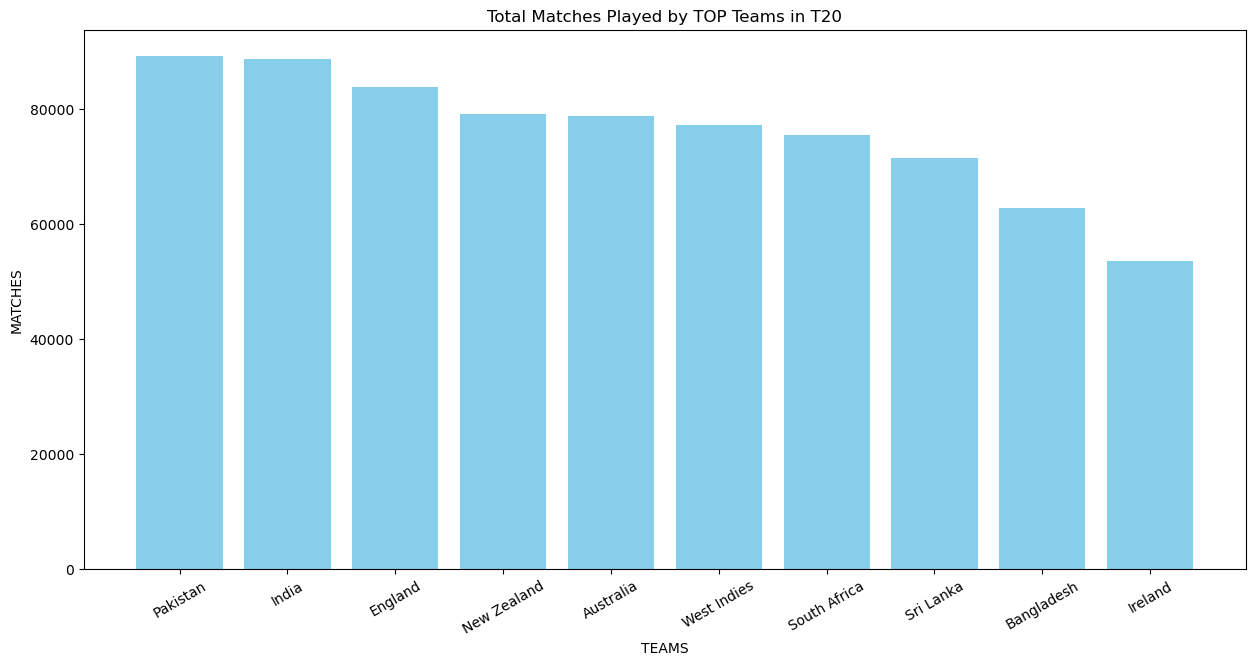

In [21]:
plt.figure(figsize=(15,7))
plt.bar(g_9["team_name"], g_9["matches_played"], color = "skyblue")
plt.title("Total Matches Played by TOP Teams in T20")
plt.xlabel("TEAMS")
plt.xticks(rotation=30)
plt.ylabel("MATCHES")
plt.show()

### Most Man of the Match Awards in IPL

In [23]:
g_10 = pd.read_sql_query("""
SELECT player_of_match, COUNT(*) AS awards
FROM (
    SELECT DISTINCT match_date, player_of_match
    FROM ipl_matches
    WHERE player_of_match IS NOT NULL
)
GROUP BY player_of_match
ORDER BY awards DESC
LIMIT 5;
""", conn_base)
g_10

,player_of_match,awards
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,21
3,V Kohli,19
4,MS Dhoni,18


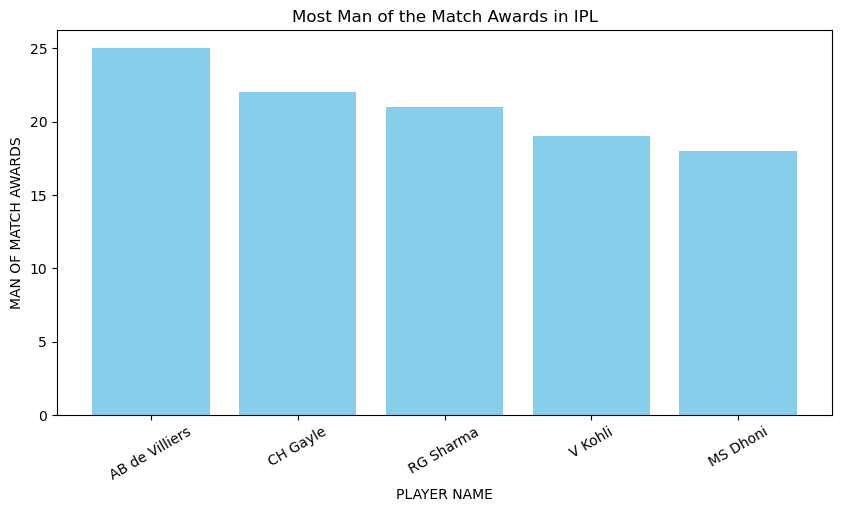

In [26]:
plt.figure(figsize=(10,5))
plt.bar(g_10["player_of_match"], g_10["awards"], color = "skyblue")
plt.title("Most Man of the Match Awards in IPL")
plt.xlabel("PLAYER NAME")
plt.xticks(rotation=30)
plt.ylabel("MAN OF MATCH AWARDS")
plt.show()

### Top 5 Bowlers by Wickets T20

In [27]:
g_11 = pd.read_sql_query("""
SELECT bowler, COUNT(*) AS wickets
FROM t20_matches
WHERE runs_batter = 0 AND win_by_wickets IS NULL AND win_by_runs IS NULL
      AND batter = player_of_match 
GROUP BY bowler
ORDER BY wickets DESC
LIMIT 5;
""", conn_base)
g_11

,bowler,wickets
0,TG Southee,17
1,M Akayezu,11
2,Chaya Mughal,11
3,AA Alleyne,10
4,Zeeshan Kukikhel,9


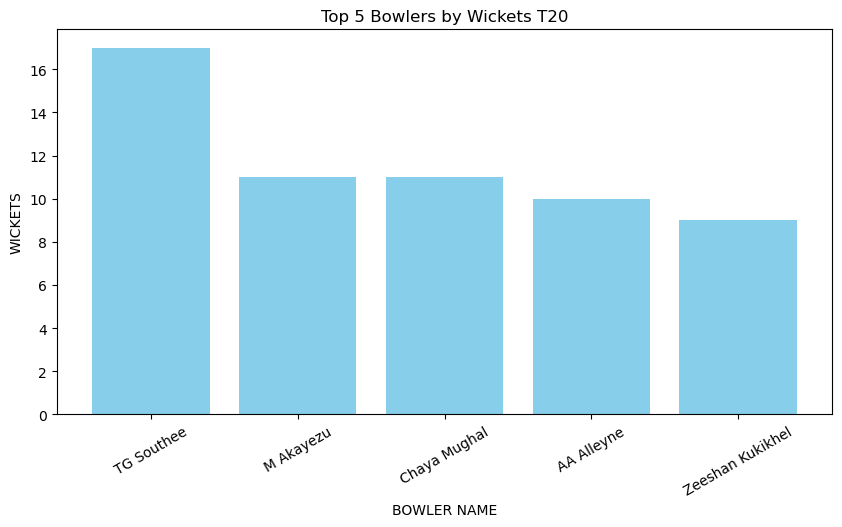

In [30]:
plt.figure(figsize=(10,5))
plt.bar(g_11["bowler"], g_11["wickets"], color = "skyblue")
plt.title("Top 5 Bowlers by Wickets T20")
plt.xlabel("BOWLER NAME")
plt.xticks(rotation=30)
plt.ylabel("WICKETS")
plt.show()

### Team with Most Wins in Test Matches

In [32]:
g_12 = pd.read_sql_query("""
SELECT winner, COUNT(*) AS win_count
FROM test_matches
WHERE winner IS NOT NULL
GROUP BY winner
ORDER BY win_count DESC
LIMIT 5;
""", conn_base)
g_12

,winner,win_count
0,Australia,244686
1,England,220963
2,India,194434
3,South Africa,166564
4,Sri Lanka,128947


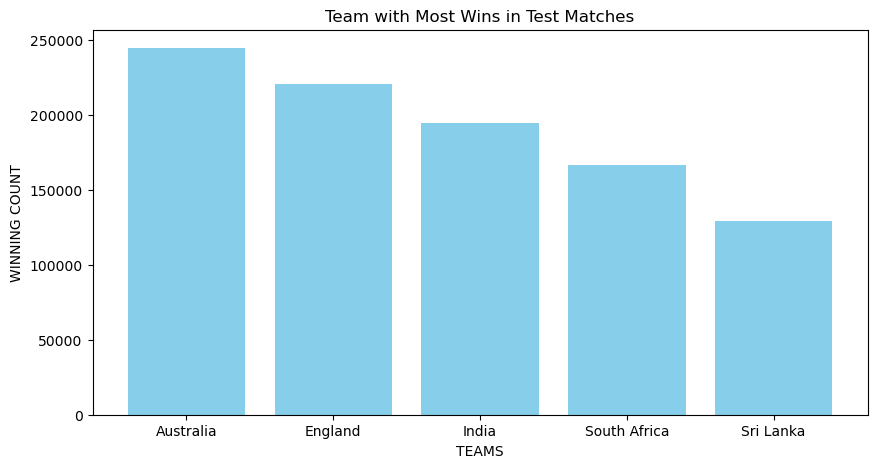

In [39]:
plt.figure(figsize=(10,5))
plt.bar(g_12["winner"], g_12["win_count"], color = "skyblue")
plt.title("Team with Most Wins in Test Matches")
plt.xlabel("TEAMS")
plt.ylabel("WINNING COUNT")
plt.show()